Impressed by your previous work, the administrators of Dino Fun World have asked you to create some charts that they can use in their next presentation to upper management. The data used for this assignment will be the same as the data used for the previous assignment.

The administrators would like you to create four graphs:

- Graph 1: A pie chart depicting visits to thrill ride attractions.

- Graph 2: A bar chart depicting total visits to food stalls.

- Graph 3: A line chart depicting attendance at the newest ride, Atmosfear over the course of the day.

- Graph 4: A box-and-whisker plot depicting total visits to the park's Kiddie Rides.


In [2]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

db_file = 'dataset/dinofunworld.db'
conn = sqlite3.connect(db_file)
c = conn.cursor()

## **Question 1 :** 

Make a Pie Chart of the visits to Thrill Ride attractions.

**Note:** 
* For this question, display the pie chart in the notebook and print the data used to create the pie chart as a list of lists (ex: [['Ride 1', 10], ['Ride 2', 100], ...])
* The pie chart must have the below mentioned parameters,
    * labels
    * title named '**Visits to Thrill Ride attractions**'
    * label with one decimal value inside wedges
    * set aspect ratio of the plot to 'equal'.
* The plot must not have the following parameters,
    * legend
    * do not set figure size
    * do not set font size or font-weight for titles and labels


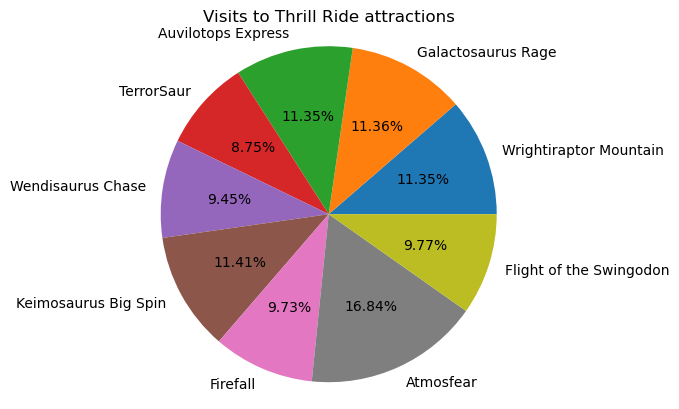

[['Wrightiraptor Mountain', 18700], ['Galactosaurus Rage', 18717], ['Auvilotops Express', 18694], ['TerrorSaur', 14415], ['Wendisaurus Chase', 15577], ['Keimosaurus Big Spin', 18792], ['Firefall', 16024], ['Atmosfear', 27747], ['Flight of the Swingodon', 16093]]


In [4]:
c.execute("SELECT attraction.name, count(checkin.visitorID) as visits FROM checkin INNER JOIN attraction on attraction.attractionID = checkin.attraction WHERE attraction.category LIKE '%Thrill%' GROUP BY attraction;")
db = c.fetchall()

data = [list(i) for i in db]
Stats = pd.DataFrame.from_records(data, columns = ['ride name', 'visits'])

plt.pie(Stats['visits'], labels = Stats['ride name'], autopct = '%0.2f%%', shadow=False)
plt.title('Visits to Thrill Ride attractions')
plt.axis('equal')
plt.show()
print(data)

## **Question 2 :** 

Make a bar chart of total visits to food stalls.

**Note:** 
* Please query attractions with category equal to "Food" and order by number of visits.
* For this question, display the bar chart in the notebook and print the data used to create the bar chart as a list of lists (ex: [['Stall 1', 10], ['Stall 2', 50], ...])
* The bar chart should be a **vertical bar plot** and must have the specified parameters listed below,
  * Set x-axis to food stalls, labeling each food stall with names rotated at a 45-degree angle and right horizontal alignment. Set y-axis to number of visits.
  * x-label ('**Food Stalls**') and y-label ('**Number of Visits**')
  * title named '**Total Visits to Food Stalls**'
* The plot must not have the following parameters,
    * legend
    * do not set figure size
    * do not set font size or font-weight for titles and labels


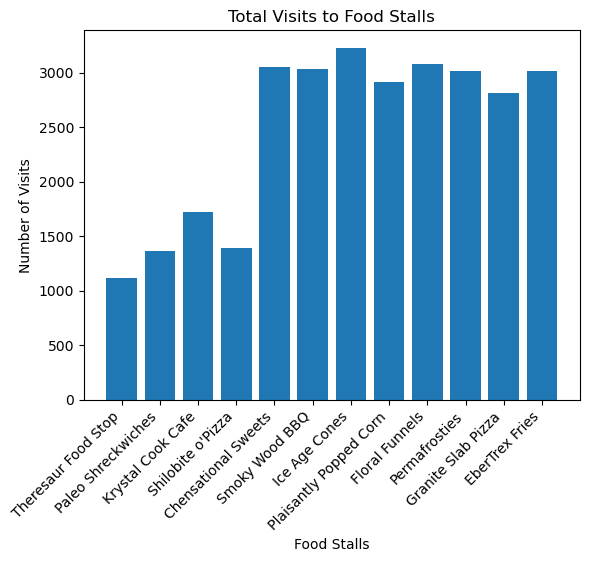

[['Theresaur Food Stop', 1116], ['Paleo Shreckwiches', 1361], ['Krystal Cook Cafe', 1725], ["Shilobite o'Pizza", 1393], ['Chensational Sweets', 3049], ['Smoky Wood BBQ', 3037], ['Ice Age Cones', 3228], ['Plaisantly Popped Corn', 2914], ['Floral Funnels', 3083], ['Permafrosties', 3018], ['Granite Slab Pizza', 2810], ['EberTrex Fries', 3018]]


In [6]:
c.execute("SELECT attraction.name, count (checkin.visitorid) as 'Visits' FROM checkin INNER JOIN attraction on attraction.attractionid = checkin.attraction WHERE attraction.category LIKE '%Food%' GROUP BY attraction;")
visits = c.fetchall()
res = [list(ele) for ele in visits] 
foodFrame = pd.DataFrame.from_records(visits, columns=['Food Stalls', 'Visits'])
plt.bar(foodFrame['Food Stalls'], foodFrame['Visits'])

plt.xticks(foodFrame['Food Stalls'], foodFrame['Food Stalls'], rotation=45, ha='right')

plt.title('Total Visits to Food Stalls')
plt.xlabel('Food Stalls')
plt.ylabel('Number of Visits')

plt.show()
print(res)

## **Question 3 :** 

Make a line chart of attendance at Atmosfear every five minutes.

**Note:** 
* For this question, use data from the table "sequences". You can assume that all activity sequences are aligned by time (i.e., the first node of all sequences occurred at the same time) and are of the same length.
* You only need to consider the first 16 hours of records in the sequences, which is considered the open hours of the park in one day. Specifically, because an activity sequence from the "sequences" table was updated/recorded every 5 minutes, you need to extract the first 192 items (16h * 60m / 5m = 192).
* Display the line chart in the notebook and print the data used to create the chart as a list of lists or tuple lists 
    * The first item in the list is irrelevant, but you can put in some meaningful information and it should be integer.The second item is the count of visits at that moment. For example, your output should look like this (in Python syntax; not relevant to the correct answer): [ (0, 0), (1, 7), (2, 3), …, (190, 4), (191, 5) ].
* The line chart must have the specified parameters listed below,
  * Set x-axis to the first element in your output list and y-axis to the second item in the list (number of visits)  
  * x-label ('**Time in minutes**') and y-label ('**Number of visits**')
  * title named '**Attendance at Atmosfear every 5 minutes**'
* The plot must not have the following parameters,
    * legend
    * do not set figure size
    * do not set font size or font-weight for titles and labels

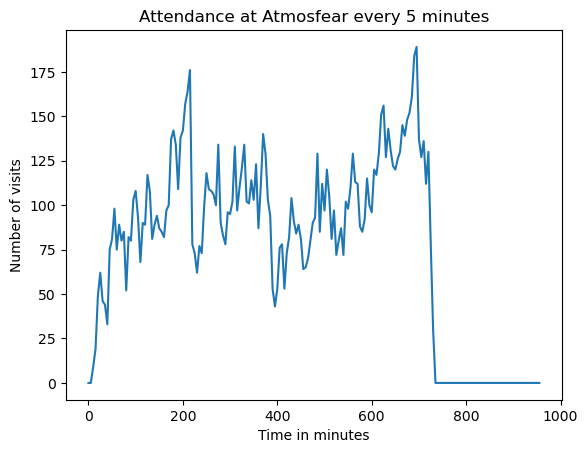

In [8]:
c.execute("SELECT * FROM sequences WHERE sequence LIKE '%8%';")
sequences = c.fetchall()

seqFrame = pd.DataFrame.from_records(sequences, columns=['index', 'visitorID', 'sequence'])

seqFrame['sequence'] = seqFrame['sequence'].apply(lambda v: [1 if i == '8' else 0 for i in v.split("-")])

visitorCnt = np.sum(seqFrame['sequence'].values.tolist(), axis=0)

visitorCnt = visitorCnt[:192]

minTime = list(range(0, 960, 5))  

res = [[i, int(visitorCnt[i])] for i in range(len(visitorCnt))]

plt.plot(minTime, visitorCnt)

plt.xlabel('Time in minutes')
plt.ylabel('Number of visits')
plt.title('Attendance at Atmosfear every 5 minutes')

plt.show()

## **Question 4:**

Make a box plot of total visits to rides in the Kiddie Rides category.

**Note:** 
* The to-be-printed data list must be ordered by AttractionID (a field in the table "attraction").
* For this question, display the box plot in the notebook and print the number of visits to each ride as a list (ex: [3, 4, 5, 6, ...])
* The boxplot chart must have the specified parameters listed below,
  * Set x-axis to Attraction and y-axis to number of visits to each ride.   
  * x-label ('**Attraction**') and y-label ('**Visitor Count**')
  * title named '**Total visits to rides in the Kiddie Rides category**'
* The plot must not have the following parameters,
    * legend
    * do not set figure size
    * do not set font size or font-weight for titles and labels

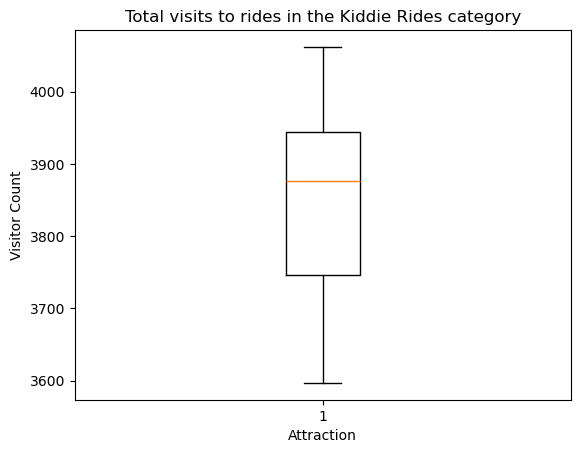

[3597, 3640, 3747, 3747, 3759, 3877, 3922, 3925, 3963, 4022, 4062]


In [10]:
c.execute("SELECT attraction.name, count (checkin.visitorid) as 'Visits' FROM checkin INNER JOIN attraction on attraction.attractionid = checkin.attraction WHERE attraction.category LIKE '%Kiddie%' GROUP BY attraction;")
visits = c.fetchall()
res = []
for i in range(len(visits)):
    res.append(visits[i][1])
res.sort()
plt.boxplot(res)
plt.title('Total visits to rides in the Kiddie Rides category')
plt.xlabel('Attraction')
plt.ylabel('Visitor Count')
plt.show()
print(res)